In [3]:
# 1.优化目标
%matplotlib inline
import numpy as np
from d2l import torch as d2l
import torch
from mpl_toolkits import mplot3d

In [2]:
def f(x):
    return x * torch.cos(np.pi * x)

In [3]:
def g(x):
    return f(x) + 0.2 * torch.cos(5 * np.pi * x)

In [4]:
def annotate(text, xy, xytext):
    d2l.plt.gca().annotate(
        text, xy = xy, xytext = xytext, 
        arrowprops = dict(arrowstyle = '->'))

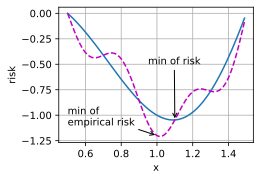

In [5]:
x = torch.arange(0.5, 1.5, 0.01)
d2l.set_figsize((4.5, 2.5))
d2l.plot(x, [f(x), g(x)], 'x', 'risk')
annotate(
    'min of\nempirical risk', (1.0, -1.2), (0.5, -1.1))
annotate('min of risk', (1.1, -1.05), (0.95, -0.5))

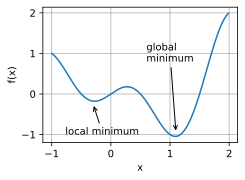

In [6]:
# 深度学习中的优化挑战
# 局部最小值
x = torch.arange(-1.0, 2.0, 0.01)
d2l.plot(x, [f(x), ], 'x', 'f(x)')
annotate('local minimum', (-0.3, -0.25), (-0.77, -1.0))
annotate('global\nminimum', (1.1, -0.95), (0.6, 0.8))

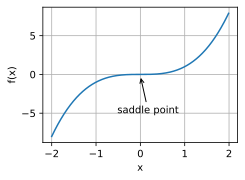

In [7]:
# 鞍点
x = torch.arange(-2.0, 2.0, 0.01)
d2l.plot(x, [x**3], 'x', 'f(x)')
annotate('saddle point', (0, -0.2), (-0.52, -5.0))

Text(0.5, 0, 'y')

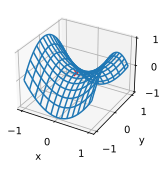

In [8]:
x, y = torch.meshgrid(
    torch.linspace(-1.0, 1.0, 101), 
    torch.linspace(-1.0, 1.0, 101))
z = x ** 2 - y ** 2
ax = d2l.plt.figure().add_subplot(
    111, projection = '3d')
ax.plot_wireframe(  # 表示线的稀疏程度
    x, y, z, **{'rstride': 8, 'cstride': 8})
ax.plot([0], [0], [0], 'rx')
ticks = [-1, 0, 1]
d2l.plt.xticks(ticks)
d2l.plt.yticks(ticks)
ax.set_zticks(ticks)
d2l.plt.xlabel('x')
d2l.plt.ylabel('y')

In [9]:
x1 = torch.tensor([1, 2, 3, 4])
y1 = torch.tensor([5, 6, 7])
x, y = torch.meshgrid(x1, y1)
x, y

(tensor([[1, 1, 1],
         [2, 2, 2],
         [3, 3, 3],
         [4, 4, 4]]),
 tensor([[5, 6, 7],
         [5, 6, 7],
         [5, 6, 7],
         [5, 6, 7]]))

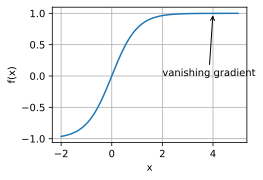

In [10]:
# 梯度消失
x = torch.arange(-2.0, 5.0, 0.01)
d2l.plot(x, [torch.tanh(x)], 'x', 'f(x)')
annotate('vanishing gradient', (4, 1), (2, 0.0))

In [11]:
# 2.凸性
%matplotlib inline
import torch
import numpy as np
from d2l import torch as d2l
from mpl_toolkits import mplot3d

In [12]:
# 定义
# 凸函数
f = lambda x: 0.5 * x ** 2
g = lambda x: torch.cos(np.pi * x)
h = lambda x: torch.exp(0.5 * x)

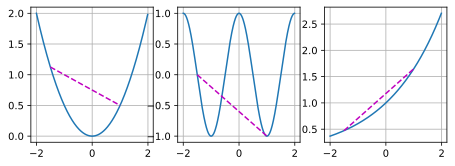

In [13]:
x, segment = torch.arange(-2, 2, 0.01), \
    torch.tensor([-1.5, 1])
d2l.use_svg_display()
_, axes = d2l.plt.subplots(1, 3, figsize = (7.5, 2.5))
for ax, func in zip(axes, [f, g, h]):
    d2l.plot(
        [x, segment], [func(x), func(segment)], 
        axes = ax)

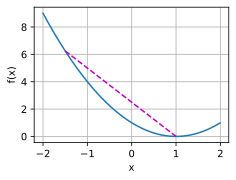

In [14]:
# 局部最小值是全局最小值
f = lambda x: (x - 1) ** 2
d2l.set_figsize(figsize = (3, 1))
d2l.plot([x, segment], [f(x), f(segment)], 'x', 'f(x)')

In [15]:
# 3.梯度下降
# 一维梯度下降
%matplotlib inline
import torch
import numpy as np
from d2l import torch as d2l

In [16]:
def f(x):  # 目标函数
    return x ** 2

In [17]:
def f_grad(x):  # 目标函数的梯度
    return x * 2

In [18]:
def gd(eta, f_grad):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x)
        results.append(float(x))
    print(f"epoch 10 --- x: {x:.3f}")
    print(results)
    return results

In [19]:
results = gd(0.2, f_grad)

epoch 10 --- x: 0.060
[10.0, 6.0, 3.5999999999999996, 2.1599999999999997, 1.2959999999999998, 0.7775999999999998, 0.46655999999999986, 0.2799359999999999, 0.16796159999999993, 0.10077695999999996, 0.06046617599999997]


In [20]:
#@save
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = torch.arange(-n, n, 0.01)
    d2l.set_figsize()
    d2l.plot(
        [f_line, results], 
        [[f(x) for x in f_line], 
         [f(x) for x in results]], 
        'x', 'f(x)', fmts = ['-', '-o'])

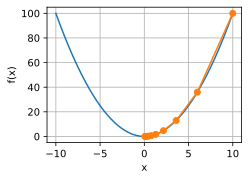

In [21]:
show_trace(results, f)

epoch 10 --- x: 3.487
[10.0, 9.0, 8.1, 7.289999999999999, 6.560999999999999, 5.9049, 5.31441, 4.782969, 4.3046720999999994, 3.8742048899999997, 3.4867844009999995]


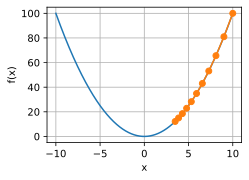

In [22]:
# 学习率
show_trace(gd(0.05, f_grad), f)

epoch 10 --- x: 61.917
[10.0, -12.0, 14.400000000000002, -17.280000000000005, 20.736000000000008, -24.883200000000013, 29.859840000000023, -35.83180800000004, 42.998169600000054, -51.59780352000007, 61.917364224000096]


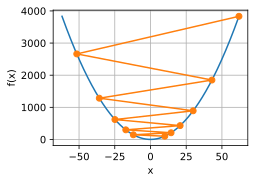

In [23]:
show_trace(gd(1.1, f_grad), f)

In [24]:
# 局部最小值
c = torch.tensor(0.15 * np.pi)
def f(x):
    return x * torch.cos(c * x)

In [25]:
def f_grad(x):
    return torch.cos(c * x) - c * x * torch.sin(c * x)

epoch 10 --- x: -1.528
[10.0, 0.5752220153808594, -1.2065879106521606, -2.2795979976654053, -1.3434159755706787, -2.2067694664001465, -1.4257888793945312, -2.1546342372894287, -1.4838756322860718, -2.114353656768799, -1.5281658172607422]


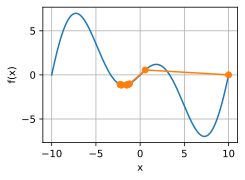

In [26]:
show_trace(gd(2, f_grad), f)

In [27]:
# 多元梯度下降
def train_2d(trainer, steps = 20, f_grad = None):
    """s1, s2 是内部状态变量"""
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(
                x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(
        f"epoch: {i + 1},\
        x1: {float(x1):f},\
        x2: {float(x2):f}")
    return results

In [28]:
#@save
def show_trace_2d(f, results):
    """显示在优化过程中显示轨迹"""
    d2l.set_figsize()
    d2l.plt.plot(
        *zip(*results), '-o', color = '#ff7f0e')
    x1, x2 = torch.meshgrid(
        torch.arange(-5.5, 1.0, 0.1), 
        torch.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(
        x1, x2, f(x1, x2), colors = '#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

In [29]:
def f_2d(x1, x2):
    return x1 ** 2 + (x2 ** 2) * 2
def f_2d_grad(x1, x2):
    return (x1 * 2, 4 * x2)
def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)

epoch: 20,        x1: -0.057646,        x2: -0.000073


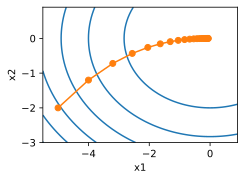

In [30]:
eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad = f_2d_grad))

In [31]:
# 自适应法
# 牛顿法
c = torch.tensor(0.5)
def f(x):
    return torch.cosh(c * x)
def f_grad(x):
    return c * torch.sinh(c * x)
def f_hess(x):
    return (c ** 2 * torch.cosh(x * c))

In [32]:
def newton(eta = 1):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x) / f_hess(x)
        results.append(float(x))
    print('epoch 10, x:', x)
    return results

epoch 10, x: tensor(0.)


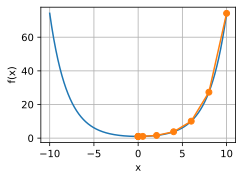

In [33]:
show_trace(newton(), f)

In [34]:
c = torch.tensor(0.15 * np.pi)
def f(x):
    return x * torch.cos(c * x)
def f_grad(x):
    return torch.cos(x * c) - c * x * torch.sin(c * x)
def f_hess(x):
    return -2 * c * torch.sin(x * c)\
        - x * c ** 2 * torch.cos(c * x)

epoch 10, x: tensor(26.8341)


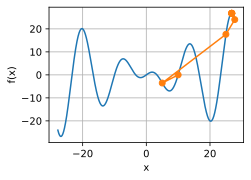

In [35]:
show_trace(newton(), f)

epoch 10, x: tensor(7.2699)


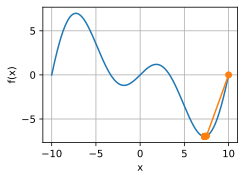

In [36]:
show_trace(newton(0.5), f)

In [37]:
# 4.随机梯度下降
%matplotlib inline
import torch
import math
from d2l import torch as d2l

In [38]:
def f(x1, x2):
    return x1 ** 2 + 2 * x2 ** 2

In [39]:
def f_grad(x1, x2):
    return 2 * x1, 4 * x2

In [40]:
def sgd(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    g1 += torch.normal(0.0, 1, (1,))
    g2 += torch.normal(0.0, 1, (1,))
    eta_t = eta * lr()
    return (x1 - eta_t * g1, x2 - eta_t * g2, 0, 0)

In [41]:
def constant_lr():
    return 1

epoch 50, x1: 0.067997, x2: 0.211041


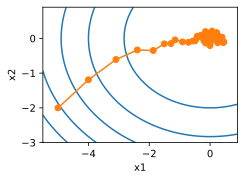

In [42]:
eta = 0.1
lr = constant_lr
d2l.show_trace_2d(
    f, d2l.train_2d(
        sgd, steps = 50, f_grad = f_grad))

In [43]:
# 动态学习率
def exponential_lr():
    global t
    t += 1
    return math.exp(-0.1 * t)

In [44]:
t = 1
lr = exponential_lr

epoch 1000, x1: -0.713778, x2: -0.048175


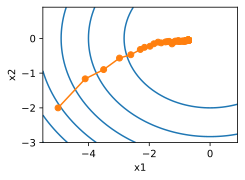

In [45]:
d2l.show_trace_2d(
    f, d2l.train_2d(
        sgd, steps = 1000, f_grad = f_grad))

In [46]:
def ploynomial_lr():
    global t
    t += 1
    return (1 + 0.1 * t) ** (-0.5)

In [47]:
t = 1
lr = ploynomial_lr

epoch: 1000,        x1: 0.069401,        x2: -0.010547


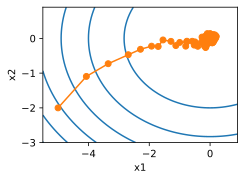

In [48]:
d2l.show_trace_2d(
    f, train_2d(
        sgd, steps = 1000, f_grad = f_grad))

In [49]:
# 5.小批量随机梯度下降
%matplotlib inline
import torch
from d2l import torch as d2l
from torch import nn
import numpy as np

In [50]:
timer = d2l.Timer()
A = torch.zeros(256, 256)
B = torch.randn(256, 256)
C = torch.randn(256, 256)

In [51]:
timer.start()
for i in range(256):
    for j in range(256):
        A[i, j] = torch.dot(B[i, :], C[:, j])
timer.stop()

1.2062344551086426

In [52]:
timer.start()
for j in range(256):
    A[:, j] = torch.mv(B, C[:, j])
timer.stop()

0.02393484115600586

In [53]:
timer.start()
A = torch.mm(B, C)
timer.stop()

0.013963699340820312

In [54]:
gigaflops = [2 / i for i in timer.times]
gigaflops

[1.658052455332877, 83.56019523856958, 143.22852069389427]

In [55]:
timer.times

[1.2062344551086426, 0.02393484115600586, 0.013963699340820312]

In [56]:
print(f"performance in Gigaflops:\n  element {gigaflops[0]:.3f}\n"
      f"  column {gigaflops[1]:.3f}\n  full {gigaflops[2]:.3f}\n")

performance in Gigaflops:
  element 1.658
  column 83.560
  full 143.229



In [57]:
timer.start()
for j in range(0, 256, 64):
    A[:, j : j + 64] = torch.mm(B, C[:, j : j + 64])
timer.stop()

0.00698399543762207

In [58]:
timer.times

[1.2062344551086426,
 0.02393484115600586,
 0.013963699340820312,
 0.00698399543762207]

In [59]:
print(f"performance in Gigaflops: block:{2 / timer.times[3]:.3f}")

performance in Gigaflops: block:286.369


In [106]:
# 阅读数据集
#@save
DATA_HUB = dict()
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/'
d2l.DATA_HUB['airfoil'] = (
    d2l.DATA_URL + 'airfoil_self_noise.dat', 
    '76e5be1548fd8222e5074cf0faae75edff8cf93f')

In [107]:
import os
def download(name, cache_dir = os.path.join('C:/Users/hasee/Desktop/cvtf', 'data')): #@save
    """下载⼀个DATA_HUB中的⽂件，返回本地⽂件名。"""
    assert name in DATA_HUB, f"{name} 不存在于 {DATA_HUB}."
    url, sha1_hash = DATA_HUB[name]
    os.makedirs(cache_dir, exist_ok = True)
    fname = os.path.join(cache_dir, url.split('/')[-1])
    if os.path.exists(fname):
        sha1 = hashlib.sha1()
        with open(fname, 'rb') as f:
            while True:
                data = f.read(1048576)
                if not data:
                    break
                sha1.update(data)
        if sha1.hexdigest() == sha1_hash:
            return fname # Hit cache
    print(f'正在从{url}下载{fname}...') 
    r = requests.get(url, stream=True, verify=True)
    with open(fname, 'wb') as f:
        f.write(r.content)
    return fname

In [108]:
#@save
def get_data_ch11(batch_size = 10, n = 1500):
    data = np.genfromtxt(
        download('airfoil'), 
        dtype = np.float32, 
        delimiter = '\t')
    data = torch.from_numpy(
        (data - data.mean(axis = 0)) / data.std(
            axis = 0))
    data_iter = d2l.load_array(
        (data[:n, :-1], data[:n, -1]), 
        batch_size, is_train = True)
    return data_iter, data.shape[1] - 1

In [101]:
a = torch.randn(3, 2)
a, a[:2, :-1], a[:2, :1], a[:2, -1]

(tensor([[ 1.5312, -0.6532],
         [-0.0079, -1.1774],
         [-0.4627,  1.6918]]),
 tensor([[ 1.5312],
         [-0.0079]]),
 tensor([[ 1.5312],
         [-0.0079]]),
 tensor([-0.6532, -1.1774]))

In [109]:
# 从头开始实现
def sgd(params, states, hyperparams):
    for p in params:
        p.data.sub_(hyperparams['lr'] * p.grad)
        p.grad.data.zero_()

In [110]:
def train_ch11(
    trainer_fn, states, hyperparams, data_iter, 
    feature_dim, num_epochs = 2):
    w = torch.normal(
        mean = 0.0, std = 0.01, 
        size = (feature_dim, 1), requires_grad = True)
    b = torch.zeros((1), requires_grad = True)
    net, loss = lambda x: d2l.linreg(x, w, b),\
        d2l.squared_loss
    animator = d2l.Animator(
        xlabel = 'epoch', ylabel = 'loss', 
        xlim = [0, num_epochs], ylim = [0.22, .035])
    n, timer = 0, d2l.Timer()
    for _ in range(num_epochs):
        for x, y in data_iter:
            l = loss(net(x), y).mean()
            l.backward()
            trainer_fn([w, b], states, hyperparams)
            n += x.shape[0]
            if n % 200 == 0:
                timer.stop()
                animator.add(
                    n / x.shape[0] / len(data_iter), 
                    (d2l.evaluate_loss(
                        net, data_iter, loss),))
                timer.start()
    print(
        f"loss:{animator.Y[0][-1]:.3f},\
        {timer.avg():.3f}sec/epoch")
    return timer.cumsum(), animator.Y[0]

In [111]:
def train_sgd(lr, batch_size, num_epochs = 2):
    data_iter, feature_dim = get_data_ch11(batch_size)
    return train_ch11(
        sgd, None, {'lr':lr}, data_iter, 
        feature_dim, num_epochs)

In [114]:
"""
gd_res = train_sgd(1, 1500, 10)
sgd_res = train_sgd(0.005, 1)
d2l.set_figsize([6, 3])
d2l.plot(
    *list(map(list, zip(gd_res, sgd_res))), 
    'time (sec)', 'loss', xlim = [1e-2, 10])
d2l.plt.gca().set_xscale('log')
"""

In [1]:
# 6.动量法
%matplotlib inline
import torch
from d2l import torch as d2l

In [2]:
eta = 0.4
def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

In [3]:
def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

epoch 20, x1: -0.943467, x2: -0.000073


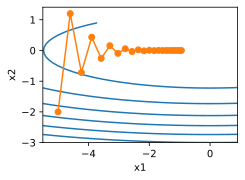

In [4]:
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

epoch 20, x1: -0.387814, x2: -1673.365109


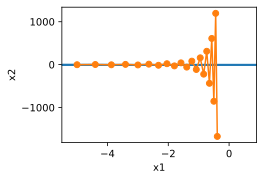

In [6]:
eta = 0.6
d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

In [7]:
# 动量方法
def momentum_2d(x1, x2, v1, v2):
    v1 = beta * v1 + 0.2 * x1
    v2 = beta * v2 + 4 * x2
    return x1 - eta * v1, x2 - eta * v2, v1, v2

epoch 20, x1: 0.007188, x2: 0.002553


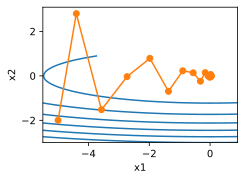

In [8]:
eta, beta = 0.6, 0.5
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

epoch 20, x1: -0.126340, x2: -0.186632


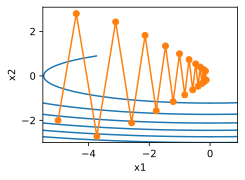

In [9]:
eta, beta = 0.6, 0.25
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

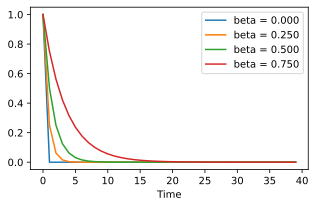

In [19]:
d2l.set_figsize([5, 3])
betas = [0., 0.25, 0.5, 0.75]
for beta in betas:
    x = torch.arange(40).detach().numpy()
    d2l.plt.plot(
        x, beta ** x, label = f"beta = {beta:.3f}")
d2l.plt.xlabel('Time')
d2l.plt.legend()

In [1]:
# 7.Adagrad
%matplotlib inline
import torch
import math
from d2l import torch as d2l

In [2]:
def adagrad_2d(x1, x2, s1, s2):
    eps = 1e-6
    g1, g2 = 0.2 * x1, 4 * x2
    s1 += g1 ** 2
    s2 += g2 **2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

In [5]:
def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

epoch 20, x1: -2.382563, x2: -0.158591


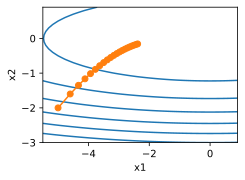

In [6]:
eta = 0.4
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

epoch 20, x1: -0.002295, x2: -0.000000


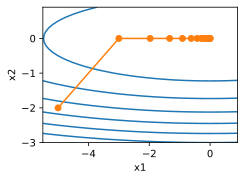

In [7]:
eta = 2
d2l.show_trace_2d(f_2d, d2l.train_2d(adagrad_2d))

In [8]:
# 从头开始实现
def init_adagrad_states(features_dim):
    s_w = torch.zeros((feature_dim, 1))
    s_b = torch.zeros(1)
    return (s_w, s_b)

In [9]:
def adagrad(params, states, hyperparamas):
    eps = 1e-6
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] += torch.square(p.grad)
            p[:] -= hyperparams[
                'lr'] * p.grad / torch.sqrt(s + eps)
        p.grad.data.zero_()

In [29]:
# 简洁实现
trainer = torch.optim.Adagrad

In [10]:
# 8.RMSProp
%matplotlib inline
import torch
import math
from d2l import torch as d2l

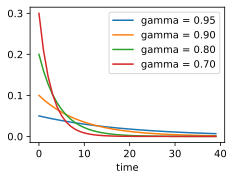

In [12]:
d2l.set_figsize()
gammas = [0.95, 0.9, 0.8, 0.7]
for gamma in gammas:
    x = torch.arange(40).detach().numpy()
    d2l.plt.plot(
        x, (1 - gamma) * gamma ** x, 
        label = f"gamma = {gamma:.2f}")
d2l.plt.xlabel('time')
d2l.plt.legend()

In [23]:
# 从头开始实现
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

In [24]:
def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

epoch 20, x1: -0.010599, x2: 0.000000


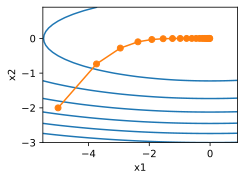

In [25]:
eta, gamma = 0.4, 0.9
d2l.show_trace_2d(f_2d, d2l.train_2d(rmsprop_2d))

In [26]:
def init_rmsprop_states(feature_dim):
    s_w = torch,zeros((feature_dim, 1))
    s_b = torch.zeros(1)
    return (s_w, s_b)

In [27]:
def rmsprop(params, states, hyperparams):
    gamma, eps = hyperparams['gamma'], 1e-6
    for p, s in zip(params, states):
        with torch.no_grad():
            s[:] = gamma * s + (
                1 - gamma) * torch.square(p.grad)
            p[:] -= hyperparams[
                'lr'] * p.grad / torch.sqrt(s + eps)
        p.grad.data.zero_()

In [28]:
# 简洁实现
trainer = torch.optim.RMSprop

In [5]:
# 9.Adadelta
%matplotlib inline
import torch
from d2l import torch as d2l

In [6]:
def init_adadelta_states(feature_dim):
    s_w, s_b = torch.zeros(
        (feature_dim, 1), 0), torch.zeros(1)
    delta_w, delta_b = torch.zeros(
        (feature_dim), 1), torch.zeros(1)
    return ((s_w, delta_w), (s_b, delta_b))

In [7]:
def adadelta(params, states, hyperparams):
    rho, eps = hyperparams['rho'], 1e-5
    for p, (s, delta) in zip(params, states):
        with torch.no_grad():
            s[:] = rho * s + (
                1 - rho) * torch.square(p.grad)
            g = (
                torch.sqrt(
                    delta + eps) / torch.sqrt(
                    s + eps)) * p.grad
            p[:] -= g
            delta[:] = rho * delta + (
                1 - rho) * g * g
        p.grad.data.zero_()

In [8]:
# 简洁实现
trainer = torch.optim.Adadelta

In [2]:
# 10.Adam
%matplotlib inline
import torch
from d2l import torch as d2l

In [3]:
def init_adam_states(feature_dim):
    v_w, v_b = torch.zeros(
        (feature_dim, 1)), torch.zeros(1)
    s_w, s_b = torch.zeros(
        (feature_dim, 1)), torch.zeros(1)
    return ((v_w, s_w), (v_b, s_b))

In [4]:
def adam(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (
                1 - beta1) * p.grad
            s[:] = beta2 * s + (
                1 - beta2) * torch.square(p.grad)
            v_bias_corr = v / (
                1 - beta1 ** hyperparams['t'])
            s_bias_corr = s / (
                1 - beta2 ** hyperparams['t'])
            p[:] -= hyperparams[
                'lr'] * v_bias_corr / (
                torch.sqrt(s_bias_corr) / eps)

In [9]:
# 简洁实现
trainer = torch.optim.Adam

### 学习率调度器（LeNet-FashionMnist）

In [18]:
%matplotlib inline
import math
from torch import nn
import torch
from d2l import torch as d2l
from torch.optim import lr_scheduler 
# 学习率调节器

In [19]:
# LeNet
def net_fn():
    model = nn.Sequential(
        nn.Conv2d(1, 6, kernel_size = 5, padding = 2), nn.ReLU(), 
        nn.MaxPool2d(kernel_size = 2, stride = 2), 
        nn.Conv2d(6, 16, kernel_size = 5), nn.ReLU(), 
        nn.MaxPool2d(kernel_size = 2, stride = 2), 
        nn.Flatten(), 
        nn.Linear(16 * 5 * 5, 120), nn.ReLU(), 
        nn.Linear(120, 84), nn.ReLU(), 
        nn.Linear(84, 10))
    return model

In [20]:
# 定义损失函数
loss = nn.CrossEntropyLoss()

In [21]:
# 调用 GPU
device = d2l.try_gpu()

In [22]:
batch_size = 256

In [23]:
from torch.utils import data
import torchvision
from torchvision import transforms
def get_dataloader_workers():  #@save
    """使用4个进程来读取数据"""
    return 4
def load_data_fashion_mnist(batch_size, resize = None):  #@save
    """下载 Fashion-mnist 数据集，然后加载到数据内存中"""
    """
    transforms.ToTensor:
    Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor
    """
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root = '~', 
                                                    train = True, transform = trans, download = True)
    mnist_test = torchvision.datasets.FashionMNIST(root = '~', 
                                                    train = False, transform = trans, download = True)
    return (data.DataLoader(mnist_train, batch_size, shuffle = True, num_workers = get_dataloader_workers()), 
            data.DataLoader(mnist_test, batch_size, shuffle = False, num_workers = get_dataloader_workers()))

In [26]:
train_iter, test_iter = load_data_fashion_mnist(batch_size = batch_size)

In [25]:
for i, j in train_iter:
    print(i.size(), j.size())
    break

torch.Size([256, 1, 28, 28]) torch.Size([256])


In [27]:
len(train_iter)

235

In [28]:
def train(
    net, train_iter, test_iter, num_epochs, 
    loss, trainer, device, scheduler = None):
    net.to(device)
    animator = d2l.Animator(
        xlabel = 'epoch', xlim = [0, num_epochs], 
        legend = ['train_loss', 'test_loss', 'test_acc'])
    for epoch in range(num_epochs):
        metric = d2l.Accumulator(3)
        # train_loss, train_acc, num_examples
        for i, (x, y) in enumerate(train_iter):
            net.train()
            trainer.zero_grad()
            x, y = x.to(device), y.to(device)
            y_hat = net(x)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            with torch.no_grad():
                metric.add(l * x.shape[0],d2l .accuracy(y_hat, y), x.shape[0])
            train_loss = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % 50 == 0:
                animator.add(
                    epoch + i / len(train_iter), 
                    (train_loss, train_acc, None))
        test_acc = d2l.evaluate_accuracy_gpu(
            net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
        if scheduler:
            if scheduler.__module__ == lr_scheduler.__name__:
                scheduler.step()
            else:
                for param_group in trainer.param_groups:
                    param_group['lr'] = scheduler(epoch)
    print(f'train loss:{train_loss:.3f},' 
          f'train acc:{train_acc:.3f},'
          f'test acc:{test_acc:.3f}')

In [29]:
lr, num_epochs = 0.3, 30
net = net_fn()
trainer = torch.optim.SGD(
    net.parameters(), lr = lr)

train loss:0.171,train acc:0.933,test acc:0.890


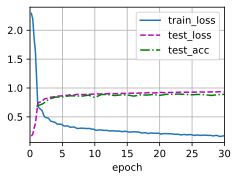

In [31]:
train(
    net, train_iter, test_iter, num_epochs, 
    loss, trainer, device)

In [38]:
print(net)

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=400, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): ReLU()
  (11): Linear(in_features=84, out_features=10, bias=True)
)


In [41]:
net[0].weight.data.size(), net[0].bias.data.size()

(torch.Size([6, 1, 5, 5]), torch.Size([6]))

In [56]:
trainer.param_groups[0]['lr']

0.018257418583505537

In [51]:
# 调度程序
lr = 0.1
trainer.param_groups[0]['lr'] = lr
print(f"Now learning rate is: {trainer.param_groups[0]['lr']:.2f}")

Now learning rate is: 0.10


In [52]:
class SquareRootScheduler:
    def __init__(self, lr = 0.1):
        self.lr = lr
    def __call__(self, num_update):
        return self.lr * pow(
            num_update + 1.0, -0.5)

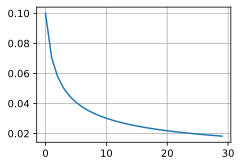

In [53]:
scheduler = SquareRootScheduler(lr = 0.1)
d2l.plot(
    torch.arange(num_epochs), 
    [scheduler(t) for t in range(num_epochs)])

train loss:0.271,train acc:0.902,test acc:0.852


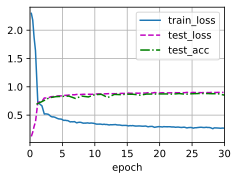

In [54]:
net = net_fn()
trainer = torch.optim.SGD(net.parameters(), lr)
train(
    net, train_iter, test_iter, 
    num_epochs, loss, trainer, device, scheduler)

In [6]:
# 策略
# 因子调度器
class FactorScheduler:
    def __init__(
        self, factor = 1, stop_factor_lr = 1e-7, 
        base_lr = 0.1):
        self.factor = factor
        self.stop_factor_lr = stop_factor_lr
        self.base_lr = base_lr
    def __call__(self, num_update):
        self.base_lr = max(
            self.stop_factor_lr, 
            self.base_lr * self.factor)
        return self.base_lr

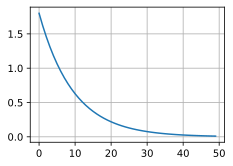

In [8]:
scheduler = FactorScheduler(
    factor = 0.9, stop_factor_lr = 1e-2, 
    base_lr = 2.0)
d2l.plot(
    torch.arange(50), 
    [scheduler(t) for t in range(50)])

In [49]:
# 多因素调度器
net = net_fn()
trainer = torch.optim.SGD(
    net.parameters(), lr = 0.5)
scheduler = lr_scheduler.MultiStepLR(
    trainer, milestones = [
        10, 15, 20, 25, 30], gamma = 0.8)
def get_lr(trainer, scheduler):
    lr = scheduler.get_last_lr()[0]
    trainer.step()
    scheduler.step()
    return lr

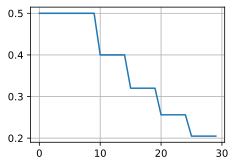

In [50]:
d2l.plot(
    torch.arange(num_epochs), 
    [get_lr(trainer, scheduler) 
     for t in range(num_epochs)])

In [65]:
# 余弦调度器
class CosineScheduler:
    def __init__(
        self, max_update, base_lr = 0.01, 
        final_lr = 0., warmup_steps = 0, 
        warmup_begin_lr = 0.1):
        self.base_lr_orig = base_lr
        self.max_update = max_update
        self.final_lr = final_lr
        self.warmup_steps = warmup_steps
        self.warmup_begin_lr = warmup_begin_lr
        self.max_steps = self.max_update - self.warmup_steps
    def get_warmup_lr(self, epoch):
        increase  = (
            self.base_lr_orig - self.warmup_begin_lr) * float(epoch) / float(self.warmup_steps) 
        return self.warmup_begin_lr + increase
    def __call__(self, epoch):
        if epoch < self.warmup_steps:
            return self.get_warmup_lr(epoch)
        if epoch <= self.max_update:
            self.base_lr = self.final_lr + (
                self.base_lr_orig - self.final_lr) * (1 + math.cos(
                math.pi * (epoch - self.warmup_steps) / self.max_steps)) / 2
        return self.base_lr

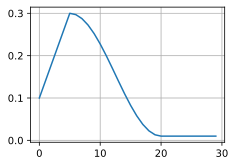

In [66]:
scheduler = CosineScheduler(warmup_steps = 5,
    max_update = 20, base_lr = 0.3, 
    final_lr = 0.01)
d2l.plot(torch.arange(num_epochs), [
    scheduler(t) for t in range(num_epochs)])

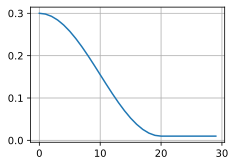

In [67]:
scheduler = CosineScheduler(warmup_steps = 0,
    max_update = 20, base_lr = 0.3, 
    final_lr = 0.01, warmup_begin_lr = 0)
d2l.plot(torch.arange(num_epochs), [
    scheduler(t) for t in range(num_epochs)])

In [76]:
def func(x):
    if x < 5:
        return 0
    if x <= 20:
        x = x + 1
    return x

In [80]:
a, b, c = func(4), func(5), func(20)
a, b, c

(0, 6, 21)